In [71]:
# First procedural code for Understanding pricing using binomial model

#The binomial stock price model is a discrete-time model used to represent the evolution of a stock price over time. 

#The model assumes that the stock price can move either up or down by a fixed amount at each time step.


In [72]:
# Import section for all Imported Modules

import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

In [74]:
# Initialise the parameters required for binomial pricing 

S0=100      # Stock Price at node  0
K=100       # Strike price of option
T=1         # Time to expiry in Years
dt=1/12     # delta time steps
r=0.1       # Risk Free rate of return
sigma=0.2   # Volatility
p=round((1/2)+((0.1)*math.sqrt(dt))/(2*sigma),2) # Probability
u=round(1+sigma*math.sqrt(dt),2)                 # Up side
d=round(1-sigma*math.sqrt(dt),2)                 # Down side
N=5                                              # No of Steps


In [75]:
%%latex
#$$ U= 1  + \sigma*\sqrt(dt) $$

<IPython.core.display.Latex object>

In [76]:
%%latex
#$$ D = 1  - \sigma*\sqrt(dt) $$

<IPython.core.display.Latex object>

In [77]:
%%latex

$$p = 1/2 + (r*\sqrt(dt)/(2*\sigma)$$

<IPython.core.display.Latex object>

In [78]:
# Sample print of the derived values

print('Upside Coeff is :',u , 'Down Side Coeff is :',d,'probability of rise is :',p,'probability of fall is :',round(1-p,2))


Upside Coeff is : 1.06 Down Side Coeff is : 0.94 probability of rise is : 0.57 probability of fall is : 0.43


In [79]:
# Declare the Variable to calculate values at respective nodes

# Initialise a numpy array for Storing the stock prices at each level

stock_price=np.array((N,N))
stock_price=np.zeros((N,N))

# Initialise a stock price at first level which is same as initialised price

stock_price[0,0]=S0

In [ ]:
"""
The stock price at any node in the binomial tree can be calculated recursively using these formulas.
or example, the stock price at node $(i, j)$ in the binomial tree is given by following equation:
where $i$ is the time step and $j$ is the number of upward movements.
"""

In [92]:
%%latex
$$S_{i,j} = S_0 \cdot u^j \cdot d^{i-j}$$

<IPython.core.display.Latex object>

In [80]:
# Iterate for loop which will move up and down the node to calculate price at each level

for i in range(1,N):
    # Moving down on First level
    stock_price[i,0]=round(d*stock_price[i-1,0])
    # optional print('down price at node',i,Asset_price[i,0])
    j=i+1
    # Moving up on First Level
    for j in range(1,j):
        stock_price[i, j] = round(u * stock_price[i - 1,j-1])
        #print('up price at node', j, Asset_price[i, j])

print('stock Prices are \n',stock_price)

stock Prices are 
 [[100.   0.   0.   0.   0.]
 [ 94. 106.   0.   0.   0.]
 [ 88. 100. 112.   0.   0.]
 [ 83.  93. 106. 119.   0.]
 [ 78.  88.  99. 112. 126.]]


In [81]:
# Initialise a numpy array for Storing corresponding the option prices at each level

call_prices=np.array((N,N))
call_prices=np.zeros((N,N))

In [82]:
"""
#option prices

# Step 1 Retrieve the terminal node expiration prices
# Step 2 Exclude the prices < 0 by replacing them to zero 

"""
expiration=stock_price[-1,:]-K

# if option type is put expiration node = K - stock_price[-1,:]

expiration=np.where(expiration>=0,expiration,0)

print('Option Values at last Node',expiration)
call_prices[-1,:]=expiration



Option Values at last Node [ 0.  0.  0. 12. 26.]


In [85]:
#Back Propagate option prices to fill out our treee

for i in range(N-2,-1,-1):
    for j in range(i+1):
        call_prices[i,j]=np.exp(-r*dt)*((1-p)*call_prices[i+1,j]+p*call_prices[i+1,j+1])

# Prices for all the options
print('All option Prices are:\n',call_prices)

# Price of the option on the starting node

print('\nOption Price at the first Node is:\n',call_prices[0,0])


All option Prices are:
 [[ 6.35165375  0.          0.          0.          0.        ]
 [ 2.16744682  9.60140917  0.          0.          0.        ]
 [ 0.          3.8343585  14.09294924  0.          0.        ]
 [ 0.          0.          6.78323684 19.81419183  0.        ]
 [ 0.          0.          0.         12.         26.        ]]

Option Price at the first Node is:
 6.351653754976161


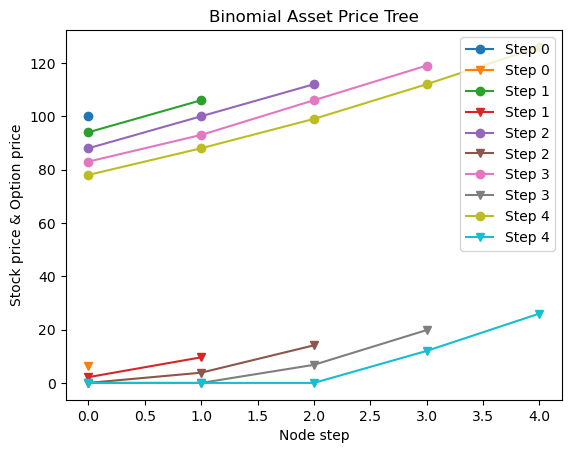

In [89]:
#  Plot the stock price and option prices

for i in range(N):
    plt.plot(stock_price[i, :i + 1], 'o-', label=f"Step {i}")
    plt.plot(call_prices[i, :i + 1], 'v-', label=f"Step {i}")
plt.xlabel("Node step")
plt.ylabel("Stock price & Option price")
plt.title("Binomial Asset Price plot")
plt.legend()